# Penguin Species

There are 17 penguin species on the planet, but the eight most iconic reside in Antarctica, its nearby islands, and the sub-Antarctic archipelagos of South Georgia and the Falklands.

For now, we are shifting our focus to mainly 3 type of penguins ie Adelie, Gentoo & Chinstrap Penguins

![](http://d3i3l3kraiqpym.cloudfront.net/wp-content/uploads/2016/04/26094914/Ad%C3%A9lie-Chinstrap-and-gentoo-penguin-species.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Checking first 5 and last 5 records from the datasets.


In [2]:
df = pd.read_csv("penguins_size.csv")
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


#### Finding the shape of data. Total no of rows and columns.

In [4]:
df.shape

(344, 7)

In [5]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**The dataset consists of 7 columns.**

* **species:** penguin species (Chinstrap, Adélie, or Gentoo)
* **island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **culmen_length_mm:** culmen length (mm)
* **culmen_depth_mm:** culmen depth (mm)
* **flipper_length_mm:** flipper length (mm)
* **body_mass_g:** body mass (g)
* **sex:** penguin sex

**Finding information of the data- data types, columns and null values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**In penguin data set, there are 7 columns and 344 rows. There are few null values present in culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex columns**

**Let us work on missing values**

In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df["culmen_length_mm"] = df["culmen_length_mm"].fillna(value=df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(value=df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value=df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value=df["body_mass_g"].mean())

In [9]:
df['sex'] = df['sex'].fillna('MALE')

In [ ]:
df.head()

**Displaying the Count of Values in the 'sex' Column**

In [11]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

**There is one missing value in sex column. Let's fix that too**

In [12]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df.loc[336,'sex'] = 'MALE'

In [14]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**There no null values in the data set now. So we can go ahead and work on EDA**

**Checking the dataset stats**

In [16]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Let's check count for each species**

In [17]:
# Count the occurrences of each species
species_counts = df['species'].value_counts()
species_counts

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**The penguin dataset consists of 344 data instances. There are 3 classes(species) - Adelie, Gentoo and Chinstrap.**

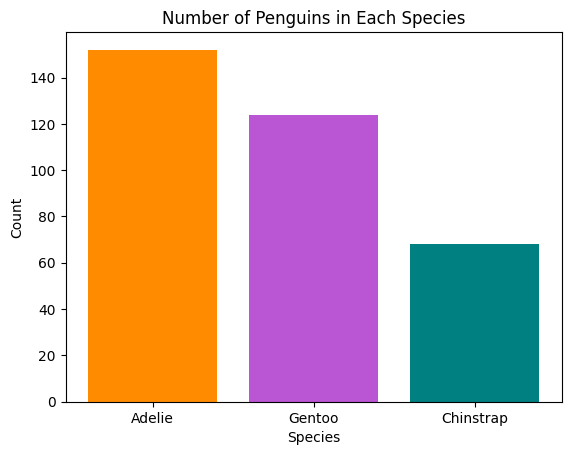

In [18]:
# Create a bar plot
plt.bar(species_counts.index, species_counts, color=('DarkOrange', 'MediumOrchid', 'Teal'))

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Penguins in Each Species')

# Show the plot
plt.show()

**Unlike iris dataset, the penguins dataset has different number of samples for each species. Adelie are the highest number followed by Gentoo and Chinstrap**

In [19]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<Axes: xlabel='island', ylabel='count'>

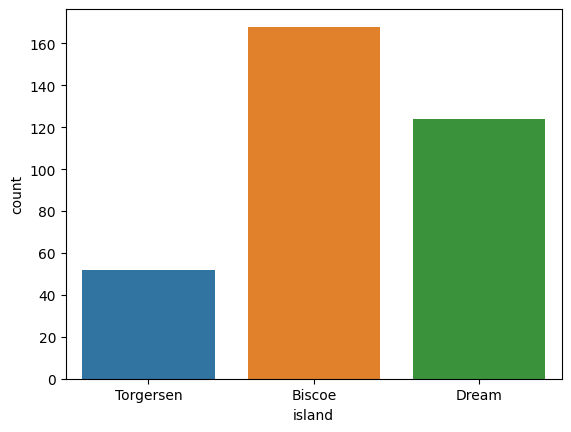

In [20]:
sns.countplot(x = "island", data = df)

**Most of the Penguins belong to Biscoe island and least are from Torgersen**

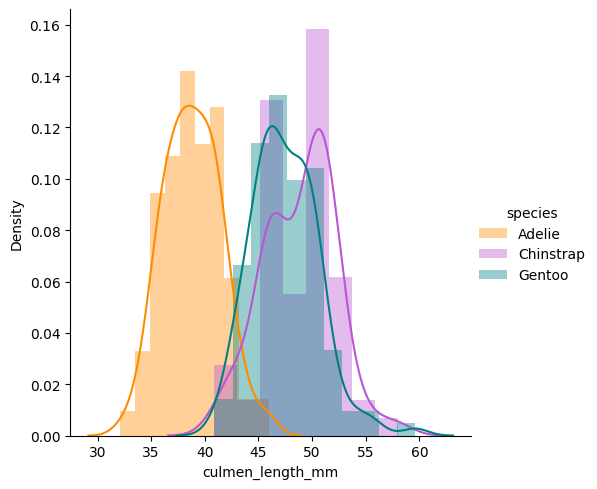

In [21]:
sns.FacetGrid(df, hue="species", height=5, palette=('DarkOrange', 'MediumOrchid', 'Teal')).map(sns.distplot,"culmen_length_mm").add_legend();

**From above plot, we see that on the basis of culmen length, Adelie is separable while the other two are overlapping**

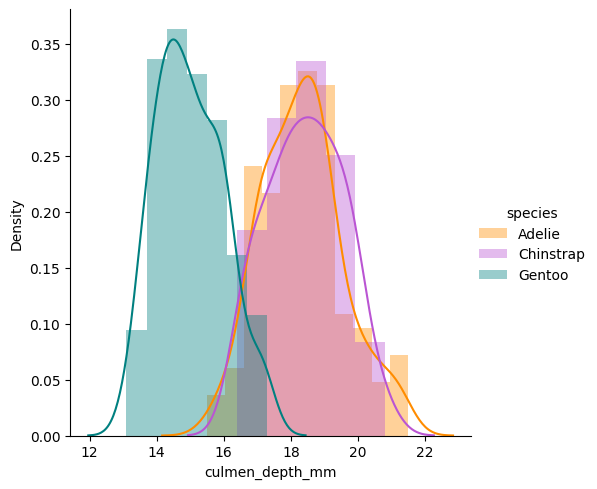

In [22]:
sns.FacetGrid(df, hue="species", height=5, palette=('DarkOrange', 'MediumOrchid', 'Teal')).map(sns.distplot,"culmen_depth_mm").add_legend();

**From above plot, we see that on the basis of culmen depth, Gentoo is separable while the other two are overlapping**

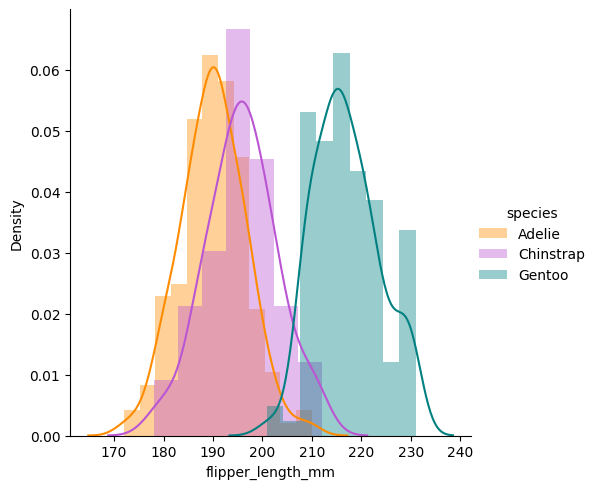

In [23]:
sns.FacetGrid(df, hue="species", height=5, palette=('DarkOrange', 'MediumOrchid', 'Teal')).map(sns.distplot,"flipper_length_mm").add_legend();

**From above plot, we see that on the basis of flipper length, Gentoo is separable while the other two are overlapping**

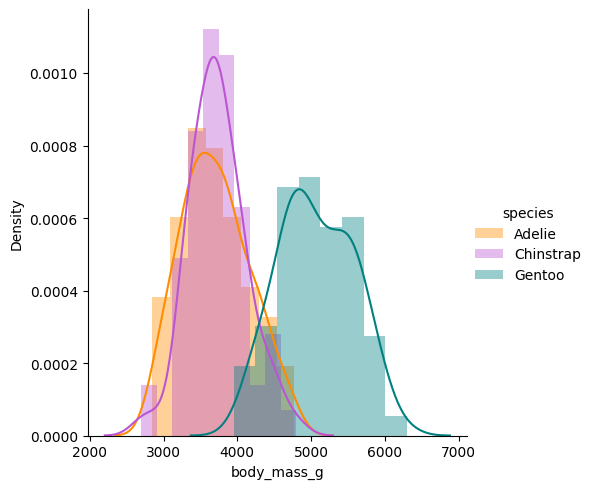

In [24]:
sns.FacetGrid(df, hue="species", height=5, palette=('DarkOrange', 'MediumOrchid', 'Teal')).map(sns.distplot,"body_mass_g").add_legend();

**From above plot, we see that on the basis of body mass, Gentoo is separable while the other two are overlapping**

<Figure size 700x700 with 0 Axes>

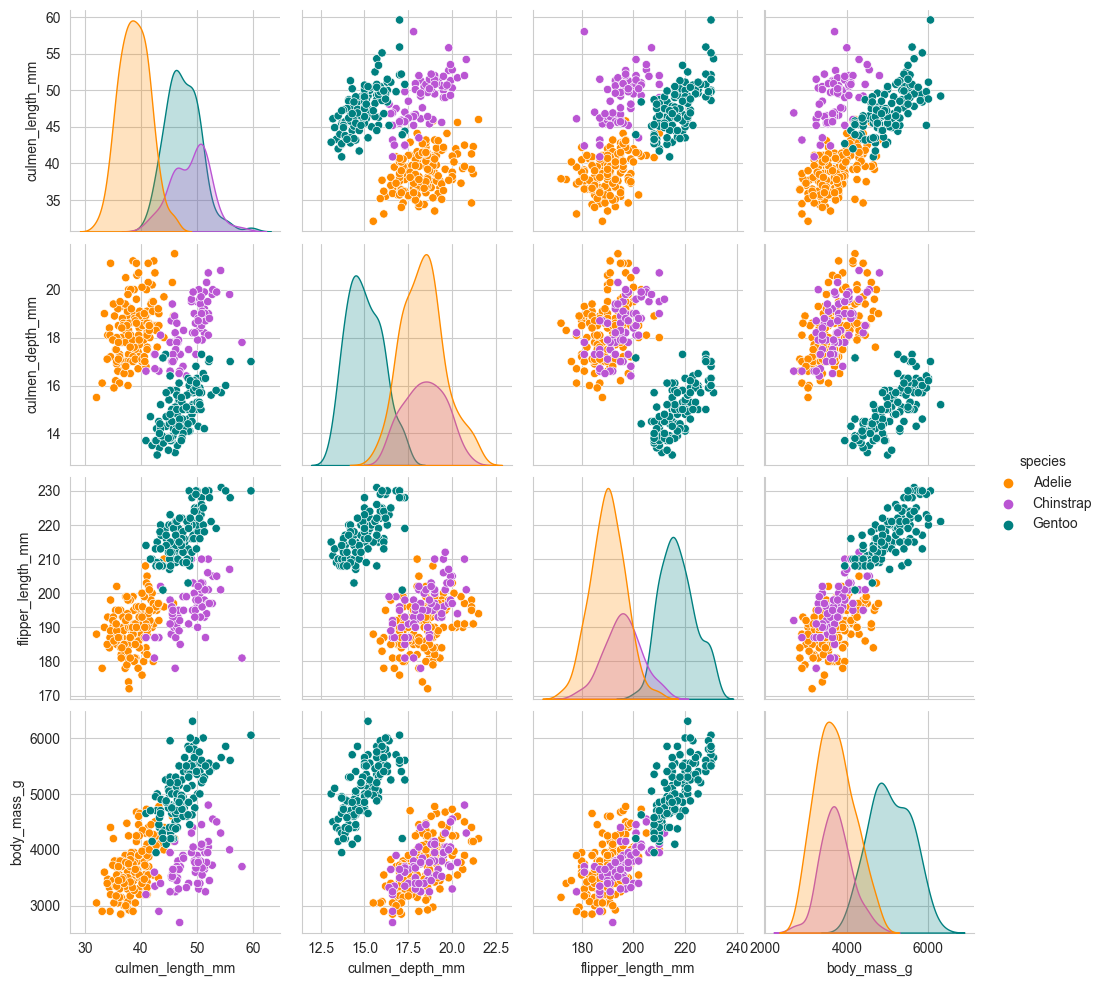

In [25]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='species', palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**From above plot we can see that,**
1. In case of culmen length, Adelie is easily seperable/distinguishable.
2. In case of culmen depth, flipper length and body mass, Gentoo is easily seperable/distinguishable.

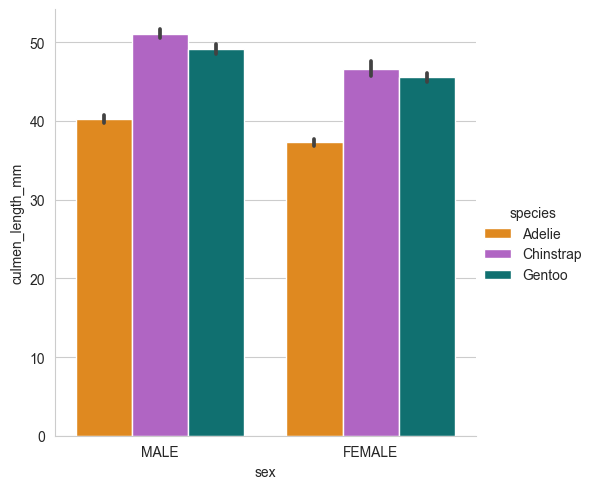

In [26]:
sns.catplot(x="sex", y="culmen_length_mm", hue="species", data=df, kind="bar", palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**Chinstrap penguins have highest culmen length in both male and female followed by Gentoo and Adelie**

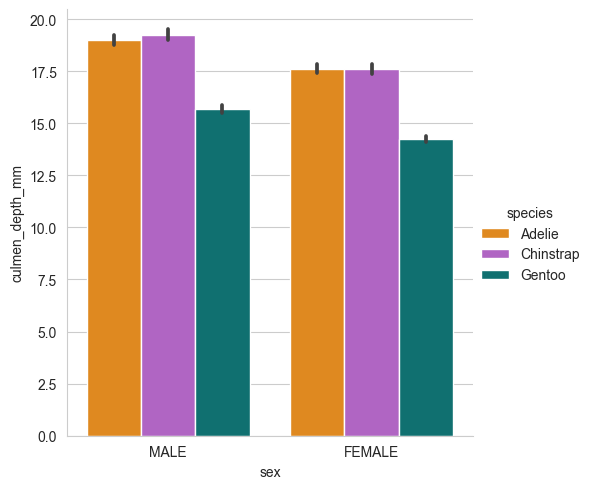

In [27]:
sns.catplot(x="sex", y="culmen_depth_mm", hue="species", data=df, kind="bar", palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**Chinstrap and Adelie penguins have almost same culmen depth in both male and female while Gentoo has the lowest**

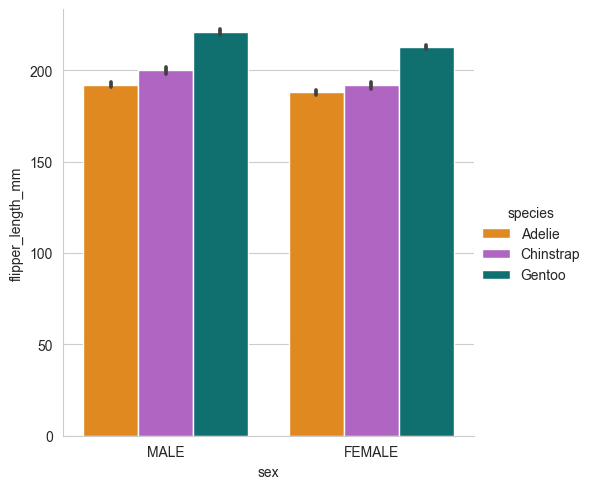

In [28]:
sns.catplot(x="sex", y="flipper_length_mm", hue="species", data=df, kind="bar", palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**Gentoo penguins have highest flipper length in both male and female**


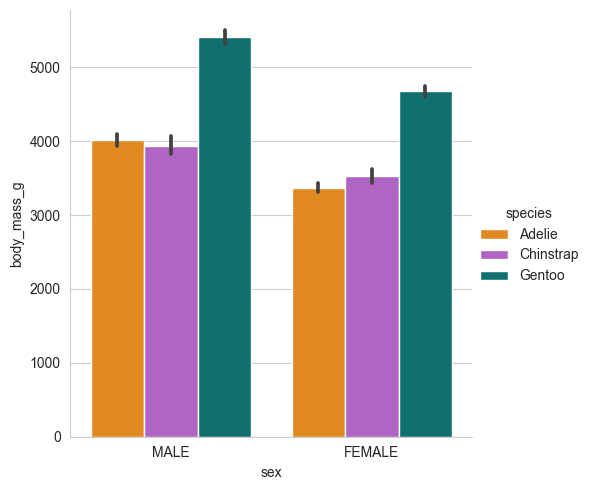

In [29]:
sns.catplot(x="sex", y="body_mass_g", hue="species", data=df, kind="bar", palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**Gentoo penguins have highest body weight in both male and female**

**Now, Let us find relationship between island, species and sex**

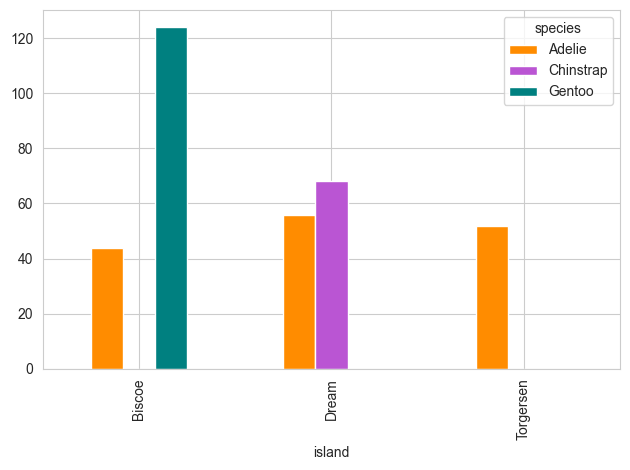

In [30]:
pd.crosstab(df['island'], df['species']).plot.bar(color=('DarkOrange', 'MediumOrchid', 'Teal'))
plt.tight_layout()

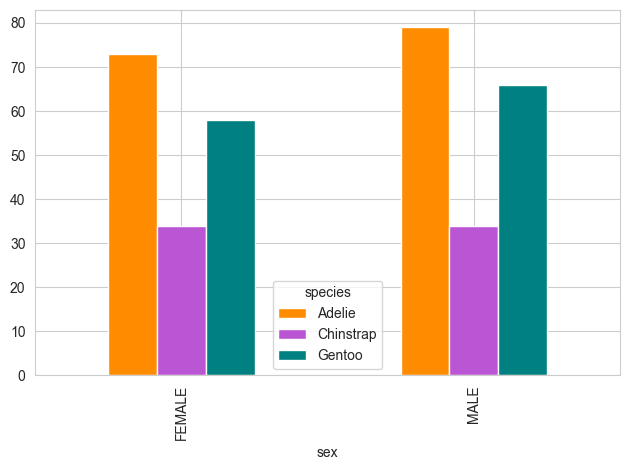

In [31]:
pd.crosstab(df['sex'], df['species']).plot.bar(color=('DarkOrange', 'MediumOrchid', 'Teal'))
plt.tight_layout()

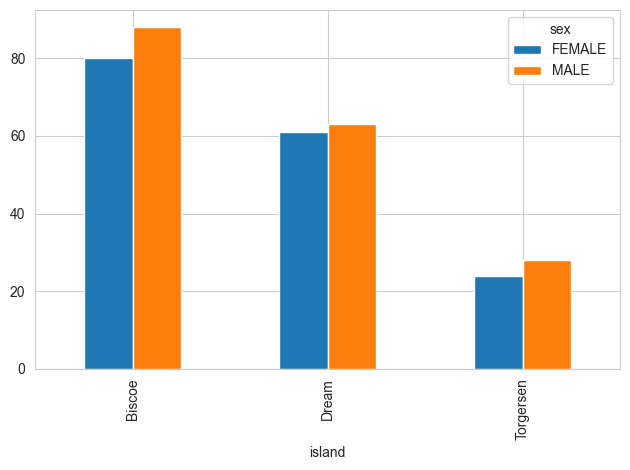

In [32]:
pd.crosstab(df['island'], df['sex']).plot.bar()
plt.tight_layout()

**From above 3 plots we clearly see that:**

1. All Chinstrap penguins live in Dream Island
2. All Gentoo penguins live in Biscoe Island
3. Adelie Penguins are distributed everywhere in all 3 islands
4. Torgersen Island contains only one type of Penguin which is Adelie
5. When compared sex with species, there is no big difference in female and male
6. Also, when compared sex with islands, there is no big difference in female and male
7. Sex is not playing a pivotal role in distinguishing penguins, and hence we can drop sex column while building ML model.

**Analyzing the relationship between culmen_length and culmen_depth**

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

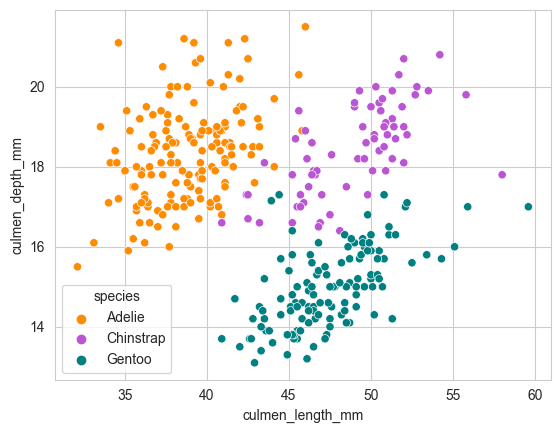

In [33]:
sns.scatterplot(x = df.culmen_length_mm, y = df.culmen_depth_mm, hue = df.species, palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**From above plot:**

* Clearly three groups of species can be identified based on culment length and depth feature
* Each of the species culmen_length and culmen_depth fall in a certain range.

**Analyzing of mass with respective of species**

<Axes: xlabel='sex', ylabel='body_mass_g'>

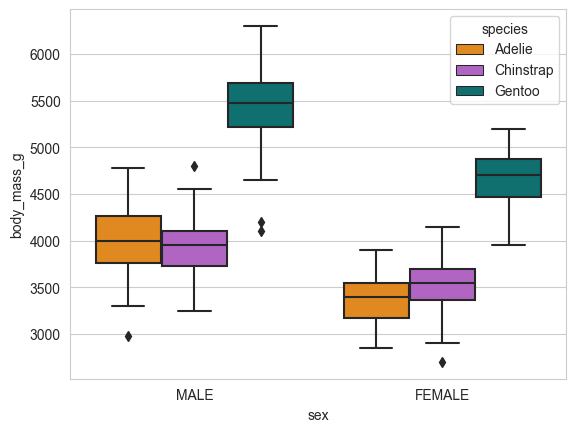

In [34]:
sns.boxplot(x = df.sex, y = df.body_mass_g, hue = df.species, palette=('DarkOrange', 'MediumOrchid', 'Teal'))

**From above plot:**

* Male penguins of all species are heavier than female penguins.
* Gentoo penguins are heavier than Adelie and Chinstrap penguins.

In [35]:
corr_mat = df.corr()
corr_mat

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


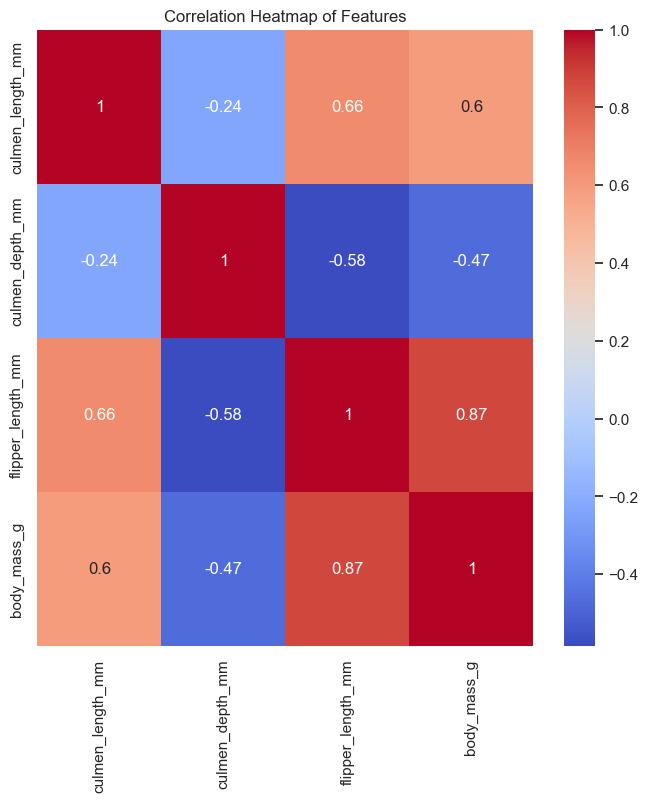

In [36]:
plt.figure(figsize=(8, 8))
sns.set()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of Features')

plt.show()

**Flipper length and body_mass are strongly dependent with corelation value of 0.87. In other words penguins with longer flips, generally weigh more.**